### Importing the dependency :-


In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics 

In [2]:
train_df = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx",sheet_name='Train')
test_df =  pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx",sheet_name='Test')

In [3]:
train_df.head(5)

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,Apartment


### Splitting the Data into training & test.

In [4]:
X_train= train_df.drop(columns=['House ID','Construction type'], axis=1)
X_test= test_df.drop(columns=['House ID','Construction type'], axis=1)

y_train= train_df['Construction type']
y_test= test_df['Construction type']

### Design a decision tree

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'gini', random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

### Accuracy and Confusion Matrix on training data

In [6]:
print("Accuracy:",metrics.accuracy_score(y_train, y_train))

Accuracy: 1.0


In [8]:
clf.classes_

array(['Apartment', 'Condo', 'House'], dtype=object)

### Accuracy and Confusion Matrix on test data

In [9]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


#### The above model has accuracy of 100 %  on the training Data while only 40% on the test data. Thus model is clealry overfitting.

### Hyperparameter Tuning (Restricting Depth, split criterion)

In [12]:
depth=[1,2,3,4,5,6,7,8,9,10]
train_accuracy=[]
test_accuracy=[]
for i in depth:
  clf=  DecisionTreeClassifier(random_state=1,max_depth=i)
  clf.fit(X_train,y_train)
  train_accuracy.append(clf.score(X_train,y_train))
  test_accuracy.append(clf.score(X_test,y_test))

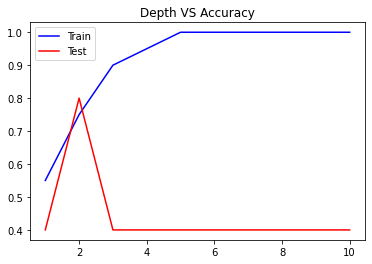

In [13]:
plt.plot(depth,train_accuracy,'b')
plt.plot(depth,test_accuracy,'r')
plt.title("Depth VS Accuracy")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()

We can see that test accuracy reaches highest at max depth of 2 and then decreases slowly.

In [18]:
clf=DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [19]:
y_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_pred, y_train))

Accuracy: 0.75


In [20]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.8


As we control the tree's complexicity the variance will decrease and the bias will increase. So we control the depth.

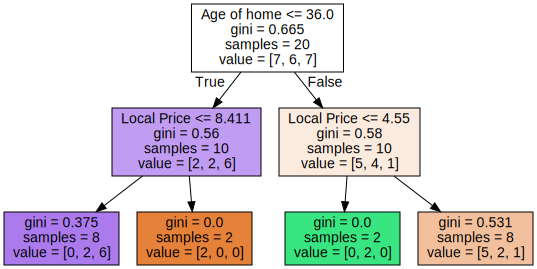

In [21]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,  feature_names=list(X_train.columns),
                                filled=True)
graphviz.Source(dot_data, format="png")